In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC  
from wordcloud import WordCloud

In [2]:
#data1 = pd.read_csv("kemik.csv")
data = pd.read_csv("labeledData.csv")
#data = pd.concat([data1,data2],ignore_index=True)

In [3]:
data.head()

,Unnamed: 0,Review,Sentiment
0,1,bu filmin katıldığı festivaller ödüllerini fi...,1
1,2,çok komik bir film ya izlediğim en iyi komedi...,1
2,3,harbiden çooooooook iyiydi herkesin dediği gi...,1
3,4,hayaller çok geniştir ve insanlar hayallerini...,1
4,5,o kadar sıcak ve samimi bir filmki tebrik etm...,1


In [4]:
del data['Unnamed: 0']

In [5]:
data['Sentiment'].value_counts()

1    10003
0     9996
Name: Sentiment, dtype: int64

In [6]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", cbar=False, ax=ax)
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

def print_validation_report(y_true, y_pred):
    print("Classification Report")
    print(classification_report(y_true, y_pred))
    acc_sc = accuracy_score(y_true, y_pred)
    print("Accuracy : "+ str(acc_sc))
    
    return acc_sc
def split_data(df):
    X = df['Review']
    y = df['Sentiment']
    return train_test_split(X,y,test_size = 0.2,random_state = 42)

In [7]:
data = data.drop_duplicates()

In [8]:
data.groupby("Sentiment").describe()

Review                                                            \
           count unique                                                top   
Sentiment                                                                    
0           9984   9984   izlediğim en kötü nazi filmitam bir hayal kır...   
1           9967   9967   dolabın arkasındaki haplardan yapılmış resmin...   

                
          freq  
Sentiment       
0            1  
1            1

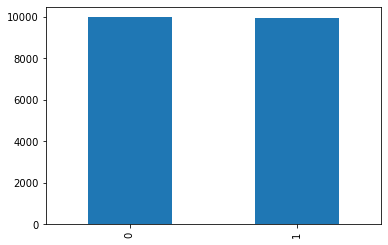

In [9]:
data.Sentiment.value_counts().plot.bar();

In [10]:
data['length'] = data['Review'].apply(len)

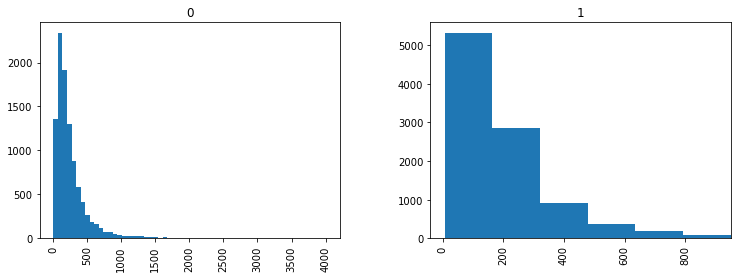

In [11]:
data.hist(column='length',by='Sentiment',bins=60,figsize=(12,4));
plt.xlim(-40,950);

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    liste = " ".join([x.lower() for x in sms_no_punctuation if not x.isdigit()]).split()
    ner = ['turkcell']
    new_list = []
    
    for word in liste:
        state=True
        for ner_item in ner:
            if ner_item in word:
                state=False
        if state:
            new_list.append(word)
                 
    sms_no_punctuation_no_stopwords = \
        [word.lower() for word in new_list if word not in stopwords.words("turkish")]
        
    review = " ".join(sms_no_punctuation_no_stopwords)
    return re.sub('\s+',' ', review)

In [14]:
print(data.head())
data['Review'] = data['Review'].apply(lambda x:remove_punctuation_and_stopwords(x))
print(data.head())

                                              Review  Sentiment  length
0   bu filmin katıldığı festivaller ödüllerini fi...          1    2012
1   çok komik bir film ya izlediğim en iyi komedi...          1      90
2   harbiden çooooooook iyiydi herkesin dediği gi...          1     130
3   hayaller çok geniştir ve insanlar hayallerini...          1     195
4   o kadar sıcak ve samimi bir filmki tebrik etm...          1     196
                                              Review  Sentiment  length
0  filmin katıldığı festivaller ödüllerini filmin...          1    2012
1  komik bir film izlediğim iyi komedilerden gülm...          1      90
2  harbiden çooooooook iyiydi herkesin dediği küv...          1     130
3  hayaller geniştir insanlar hayallerini gerçekl...          1     195
4  kadar sıcak samimi bir filmki tebrik etmek laz...          1     196


In [18]:
Positive_Reviews = pd.Series(data[data['Sentiment'] == 1]['Review'].tolist()).astype(str)
Negative_Reviews = pd.Series(data[data['Sentiment'] == 0]['Review'].tolist()).astype(str)

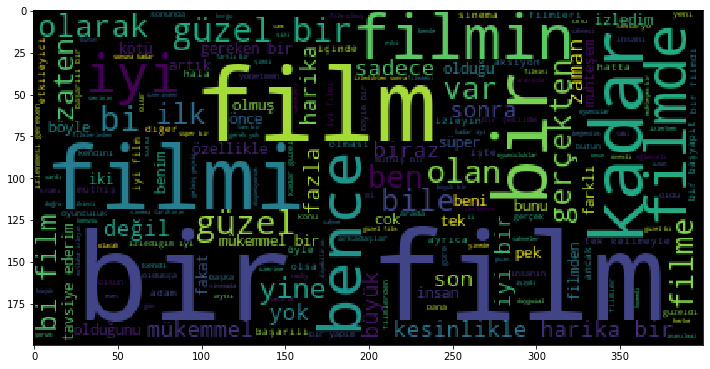

In [19]:
spam_messages_one_string = " ".join(Positive_Reviews.astype(str))
spam_cloud = WordCloud().generate(spam_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

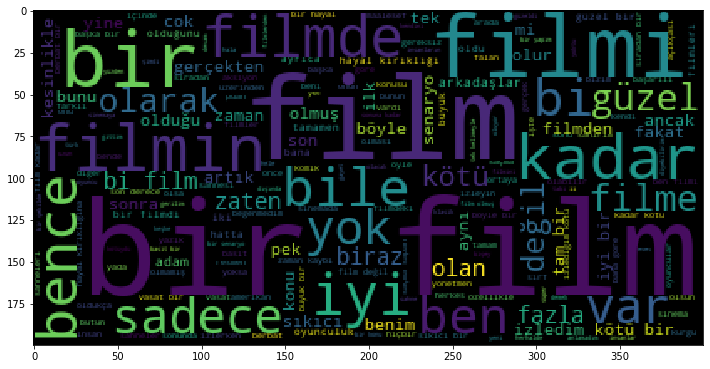

In [20]:
spam_messages_one_string = " ".join(Negative_Reviews.astype(str))
spam_cloud = WordCloud().generate(spam_messages_one_string)
plt.figure(figsize=(12,8))
plt.imshow(spam_cloud)

In [21]:
bow_transformer = CountVectorizer().fit(data['Review'])

In [22]:
print(len(bow_transformer.vocabulary_))

106417


In [23]:
sample_spam = data['Review'][125]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

gayet güzel bir filmdibaşlangıçta hikaye ilerlemiyor gibiydi sonradan güzel bir hal aldısonu gayet güzel filmi asıl iyi yapan oyunculuklar olmuşoyunculukların herbiri mükemmelyalnız önce yazmışfilmin başında bir cenaze sahnesi var ölü olan kişi ciddi ciddi nefes alıyorbence önemli bir hata gözden kaçmış olabilir tabiiama film izlenmeliçünkü gerçekten iyi bir hikayesi var
  (0, 2968)	1
  (0, 3769)	1
  (0, 7058)	1
  (0, 11595)	1
  (0, 14718)	5
  (0, 19272)	1
  (0, 19568)	2
  (0, 32958)	1
  (0, 33297)	1
  (0, 33682)	1
  (0, 35702)	2
  (0, 37344)	1
  (0, 38344)	1
  (0, 41448)	1
  (0, 42179)	3
  (0, 43039)	1
  (0, 43921)	1
  (0, 44954)	1
  (0, 45360)	1
  (0, 45400)	1
  (0, 46944)	1
  (0, 49077)	2
  (0, 50248)	1
  (0, 56222)	1
  (0, 57676)	1
  (0, 65490)	1
  (0, 66168)	1
  (0, 67502)	1
  (0, 67862)	1
  (0, 69245)	1
  (0, 71430)	1
  (0, 75364)	1
  (0, 80505)	1
  (0, 83953)	1
  (0, 90472)	2
  (0, 93794)	1
  (0, 95907)	1
  (0, 103330)	1
  (0, 103436)	1
  (0, 103496)	1


In [24]:
print(np.shape(bow_sample_spam))

(1, 106417)


In [25]:
bow_data = bow_transformer.transform(data['Review'])

In [26]:
bow_data.shape

(19951, 106417)

In [57]:
print( bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]) *100 )

0.02495603690311549


In [58]:


tfidf_transformer = TfidfTransformer().fit(bow_data)

tfidf_sample_ham = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_ham)

  (0, 103496)	0.10726717441482034
  (0, 103436)	0.09083404892553493
  (0, 103330)	0.16211353719147933
  (0, 95907)	0.2118868001020559
  (0, 93794)	0.11747122740969695
  (0, 90472)	0.14665881930732844
  (0, 83953)	0.2118868001020559
  (0, 80505)	0.1416367986610342
  (0, 75364)	0.1014474361809402
  (0, 71430)	0.11093107031841358
  (0, 69245)	0.2118868001020559
  (0, 67862)	0.07964860113116173
  (0, 67502)	0.10767418868802885
  (0, 66168)	0.14970419698641102
  (0, 65490)	0.2118868001020559
  (0, 57676)	0.11780334750081586
  (0, 56222)	0.1662788714314646
  (0, 50248)	0.20347053536528062
  (0, 49077)	0.10982628442897305
  (0, 46944)	0.19286729578197215
  (0, 45400)	0.12185738354996051
  (0, 45360)	0.11277363162557243
  (0, 44954)	0.18908283576676027
  (0, 43921)	0.13310359241573602
  (0, 43039)	0.1472593671113809
  (0, 42179)	0.17731817461433222
  (0, 41448)	0.16119084916153273
  (0, 38344)	0.14309403287139563
  (0, 37344)	0.07589079260199162
  (0, 35702)	0.20100979729970664
  (0, 33682)	0.

In [59]:
x_train, x_test, y_train, y_test = split_data(data)

In [52]:
pipe_MNB = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_MNB' , MultinomialNB()),
                    ])

In [53]:
pipe_MNB.fit(X=x_train, y=y_train)
pred_test_MNB = pipe_MNB.predict(x_test)
acc_MNB = accuracy_score(y_test, pred_test_MNB)


In [54]:
print(acc_MNB)

0.642946629917314


In [55]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe_MNB, x_train, y_train, cv=5)
print(np.mean(scores))

0.6342110613857365


In [78]:
confusion_matrix(y_test,pred_test_MNB)
print_validation_report(y_test,pred_test_MNB)

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.73      0.67      1990
           1       0.67      0.56      0.61      2001

   micro avg       0.64      0.64      0.64      3991
   macro avg       0.65      0.64      0.64      3991
weighted avg       0.65      0.64      0.64      3991

Accuracy : 0.642946629917314


0.642946629917314

In [83]:
pipe_RFC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_RFC' , RandomForestClassifier(n_estimators=400,criterion='entropy',max_depth=8)),
                    ])
pipe_RFC.fit(X=x_train, y=y_train)
pred_test_RFC = pipe_RFC.predict(x_test)
acc_RFC = accuracy_score(y_test, pred_test_RFC)

In [84]:
scores = cross_val_score(pipe_RFC, x_train, y_train, cv=5)
print(np.mean(scores))

0.6600258146878897


In [85]:
confusion_matrix(y_test,pred_test_RFC)
print_validation_report(y_test,pred_test_RFC)

Classification Report
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1990
           1       0.69      0.62      0.65      2001

   micro avg       0.67      0.67      0.67      3991
   macro avg       0.67      0.67      0.67      3991
weighted avg       0.67      0.67      0.67      3991

Accuracy : 0.6695063893760962


0.6695063893760962

In [97]:
from sklearn.svm import SVC  
pipe_SVC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(kernel='rbf',shrinking=True,C=750)),
                    ])
pipe_SVC.fit(X=x_train, y=y_train)
pred_test_SVC = pipe_SVC.predict(x_test)
acc_SVC = accuracy_score(y_test, pred_test_SVC)


/anaconda3/envs/nlp_course/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [98]:
print(acc_SVC)

0.6860435980957154


In [92]:
confusion_matrix(y_test,pred_test_SVC)
print_validation_report(y_test,pred_test_SVC)

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1990
           1       0.70      0.64      0.67      2001

   micro avg       0.68      0.68      0.68      3991
   macro avg       0.68      0.68      0.68      3991
weighted avg       0.68      0.68      0.68      3991

Accuracy : 0.6825357053370082


0.6825357053370082

In [72]:
pipe_LRC= Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_LRC' , LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')),
                    ])
pipe_LRC.fit(X=x_train, y=y_train)
pred_test_LRC = pipe_LRC.predict(x_test)
acc_LRC = accuracy_score(y_test, pred_test_LRC)


In [73]:
print(acc_LRC)

0.6692558256076171


In [75]:
scores = cross_val_score(pipe_LRC, x_train, y_train, cv=5)
print(np.mean(scores))

0.6609025364693388


In [81]:
confusion_matrix(y_test,pred_test_LRC)
print_validation_report(y_test,pred_test_LRC)

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.69      0.68      1990
           1       0.68      0.64      0.66      2001

   micro avg       0.67      0.67      0.67      3991
   macro avg       0.67      0.67      0.67      3991
weighted avg       0.67      0.67      0.67      3991

Accuracy : 0.6692558256076171


0.6692558256076171